# Programmieraufgaben zu 2.2 (Logistische Regression)

## Frage 1

Sei ein Datensatz gegeben durch

$$
D={((2,7),-1),((7.5,0.5),-1),((3,3.3),-1),((2.5,7.5),1),((4,3.8),1),((5,2),1)}
$$

Bestimmen Sie, unter Nutzung von Python und scikit-learn, die optimale lineare soft-margin SVM bzgl. $D$.

In [171]:
D=(((2,7),-1),((7.5,0.5),-1),((3,3.3),-1),((2.5,7.5),1),((4,3.8),1),((5,2),1))
X=[x[0] for x in D]
y=[x[1] for x in D]

X, y

([(2, 7), (7.500, 0.500), (3, 3.300), (2.500, 7.500), (4, 3.800), (5, 2)],
 [-1, -1, -1, 1, 1, 1])

In [172]:
from sklearn.svm import SVC # Steht für: SVM Classifier

model = SVC(kernel="linear").fit(X,y)

In [175]:
model.coef_, model.intercept_

(array([[0.32013936, 0.51450904]]), array([-3.65858851]))

## Frage 2

Seien ein Trainingsdatensatz $D_\text{train}$  und ein Testdatensatz $D_\text{test}$ gegeben durch

- $D_\text{train}=\{(((8.7,16.5),1),((10.8,14.8),1),((12,16.7),1),((12.2,12.2),1),((16.5,13),−1),((5.8,23.5),−1)\}$
- $D_\text{test}=\{((13,12.5),1),((6.2,21.3),−1),((6,25.8),1),((8.5,27.7),−1)\}$

Die folgenden Aufgaben sollen unter Nutzung von Python und scikit-learn durchgeführt werden.


1. Plotten Sie den Datensatz $D_\text{train}$.
2. Bestimmen Sie anhand des Plots aus dem vorherigen Schritt eine geeignete Kernel-Funktion.
3. Bestimmen Sie die Supportvektoren der optimale soft-margin SVM bzgl. $D_\text{train}$
4. Berechnen Sie die folgenden Maße bzgl. Dtest und der zuvor trainierten SVM:
    - Genauigkeit
    - Precision
    - Recall
    - F1

In [80]:
D_train=(((8.7,16.5),1),((10.8,14.8),1),((12,16.7),1),((12.2,12.2),1),((16.5,13),-1),((5.8,23.5),-1))
D_test=((13,12.5),1),((6.2,21.3),-1),((6,25.8),1),((8.5,27.7),-1)

X_train = [x[0] for x in D_train]
y_train = [x[1] for x in D_train]

X_test = [x[0] for x in D_test]
y_test = [x[1] for x in D_test]

### 1.) Plotten von $D^\text{train}$

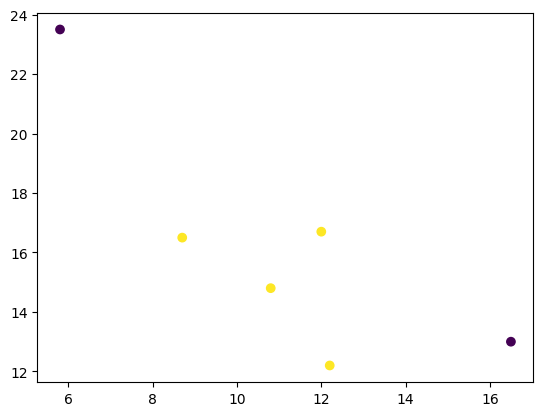

In [101]:
import matplotlib.pyplot as plt

plt.scatter(*zip(*X_train), c=y_train)
plt.show()

### 2, 3 und 4.)

Anhand der gegebenen Daten eine Entscheidung zu treffen ist gar nicht so einfach.

Es scheint so, als würde sich die Klasse 1 zentriert anordnen. Man könnte einen RBF-Kernel wählen, um einen Kreis um die Daten zu ziehen.

Andererseits ließe sich auch anhand eines Polynoms eine Gerade ziehen. Wir plotten einmal beide Decision Boundaries:

In [161]:
from sklearn.svm import SVC

print("Training rbf-Kernel")
model_rbf = SVC(kernel="rbf", verbose=True).fit(X_train, y_train)
print("\n\nTraining poly-Kernel")
model_poly = SVC(kernel="poly", verbose=True).fit(X_train, y_train)

Training rbf-Kernel
[LibSVM]*
optimization finished, #iter = 3
obj = -2.595864, rho = 0.049254
nSV = 5, nBSV = 3
Total nSV = 5


Training poly-Kernel
[LibSVM]....*..*
optimization finished, #iter = 36
obj = -0.029290, rho = 3.331094
nSV = 3, nBSV = 0
Total nSV = 3


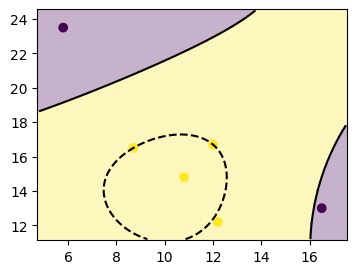

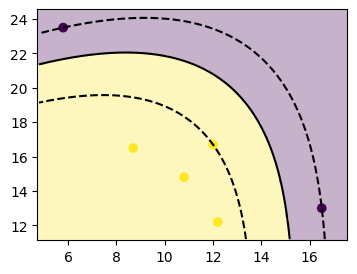

In [151]:
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_boundary(model):
    _, ax = plt.subplots(figsize=(4, 3))
    common_params = {"estimator": model, "X": np.array(X_train), "ax": ax}
    DecisionBoundaryDisplay.from_estimator(**common_params, response_method="predict",
            plot_method="pcolormesh",
            alpha=0.3,)

    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )
    plt.scatter(*zip(*X_train), c=y_train)
    plt.show()

plot_decision_boundary(model_rbf)
plot_decision_boundary(model_poly)

Wenn ich ehrlich sein soll, viel klüger bin ich jetzt auch nicht. Schauen wir uns mal Accuracy, Precision, Recall und F1 für die beiden Modelle an...

In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(model: SVC):
    y_true = y_test
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred)}")
    print(f"Recall: {recall_score(y_true, y_pred)}")
    print(f"F1: {f1_score(y_true, y_pred)}")


print("--- RBF-Metrics ---")
print_metrics(model_rbf)
print()
print("--- Poly-Metrics ---")
print_metrics(model_poly)

--- RBF-Metrics ---
Accuracy: 0.75
Precision: 1.0
Recall: 0.5
F1: 0.6666666666666666

--- Poly-Metrics ---
Accuracy: 0.5
Precision: 0.5
Recall: 0.5
F1: 0.5


Da RBF besser abschneidet, wählen wir den RBF Kernel. Wir lassen uns noch die Supportvektor ausgeben und sind fertig.

In [168]:
model_rbf.support_vectors_

array([[16.5, 13. ],
       [ 5.8, 23.5],
       [ 8.7, 16.5],
       [12. , 16.7],
       [12.2, 12.2]])